Tugas Analasisi Big Data

Nama : Clarissa Sanindita Reikisyifa

NIM : 202010370311232

#Load Dataset and Library

In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
df_ass = pd.read_csv('/content/drive/MyDrive/dataset/analisis_bigdata/assessments.csv')
df_cours = pd.read_csv('/content/drive/MyDrive/dataset/analisis_bigdata/courses.csv')
df_studass = pd.read_csv('/content/drive/MyDrive/dataset/analisis_bigdata/studentAssessment.csv')
df_studin = pd.read_csv('/content/drive/MyDrive/dataset/analisis_bigdata/studentInfo.csv')
df_studreg = pd.read_csv('/content/drive/MyDrive/dataset/analisis_bigdata/studentRegistration.csv')
df_studvle = pd.read_csv('/content/drive/MyDrive/dataset/analisis_bigdata/studentVle.csv')
df_vle = pd.read_csv('/content/drive/MyDrive/dataset/analisis_bigdata/vle.csv')

#Assesments

**EDA**

In [11]:
df_ass.shape

(206, 6)

(206, 6) memberi informasi bahwa dataset terdiri dari 206 baris data dan 6 kolom variabel.

In [12]:
df_ass.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [13]:
df_ass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


Penjelasan feature

1   code_presentation : kode identifikasi modul tempat penilaian berada.

2   id_assessment : nomor identifikasi penilaian.

3   assessment_type : tipe penilaian. Ada tiga jenis penilaian: Tutor Marked Assessment (TMA), Computer Marked Assessment (CMA) dan Ujian Akhir (Exam)

4   date : informasi tanggal penyerahan akhir penilaian yang dihitung sebagai jumlah hari sejak dimulainya presentasi modul. Tanggal mulai presentasi diberi angka 0 (nol).

5   weight : bobot penilaian dalam%. Biasanya, Ujian diperlakukan secara terpisah dan memiliki bobot 100%; jumlah seluruh penilaian lainnya adalah 100%.

In [14]:
df_ass.describe()

,id_assessment,date,weight
count,206.000000,195.000000,206.000000
mean,26473.975728,145.005128,20.873786
std,10098.625521,76.001119,30.384224
min,1752.000000,12.000000,0.000000
25%,15023.250000,71.000000,0.000000
50%,25364.500000,152.000000,12.500000
75%,34891.750000,222.000000,24.250000
max,40088.000000,261.000000,100.000000


id_assesment memiliki jumlah 206 data dengan nilai tertinggi 40088 dan nilai terendahnya 1752. Memiliki nilai rata-rata 26474.


date memiliki jumlah 195 data dengan nilai tertinggi 261 dan nilai terendahnya 12. Memiliki nilai rata-rata 145.

weight memiliki jumlah 206 data dengan nilai tertinggi 100 dan nilai terendahnya 0. Memiliki nilai rata-rata 21.

**Cleaning Data**

In [15]:
nilai_null = df_ass.isnull().sum()
print("Nilai Null:")
print(nilai_null)

nilai_duplikat = df_ass.duplicated().sum()
print("\nNilai Duplikat:", nilai_duplikat)

Nilai Null:
code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

Nilai Duplikat: 0


Terdapat 11 data bernilai null dan 0 data yang duplikat

In [16]:
df_ass=df_ass.ffill() #mengisi nilai yang hilang
df_ass=df_ass.drop_duplicates() #menghapus nilai yang duplikat

In [17]:
df_ass.isna().sum()

code_module          0
code_presentation    0
id_assessment        0
assessment_type      0
date                 0
weight               0
dtype: int64

**Visualisasi**

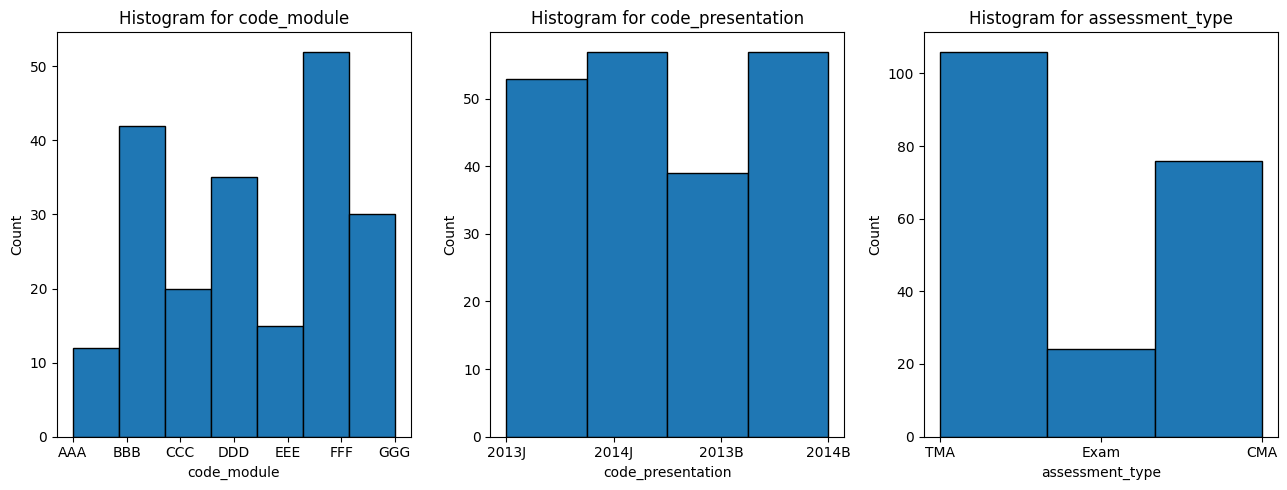

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(13, 5))

ax[0].hist(df_ass['code_module'], bins=len(df_ass['code_module'].unique()), edgecolor='black')
ax[0].set_xlabel('code_module')
ax[0].set_ylabel('Count')
ax[0].set_title('Histogram for code_module')

ax[1].hist(df_ass['code_presentation'], bins=len(df_ass['code_presentation'].unique()), edgecolor='black')
ax[1].set_xlabel('code_presentation')
ax[1].set_ylabel('Count')
ax[1].set_title('Histogram for code_presentation')

ax[2].hist(df_ass['assessment_type'], bins=len(df_ass['assessment_type'].unique()), edgecolor='black')
ax[2].set_xlabel('assessment_type')
ax[2].set_ylabel('Count')
ax[2].set_title('Histogram for assessment_type')

plt.tight_layout()
plt.show()


#Course

**EDA**

In [19]:
df_cours.shape

(22, 3)

(22, 3) memberi informasi bahwa dataset terdiri dari 22 baris data dan 3 kolom variabel.

In [20]:
df_cours.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [21]:
df_cours.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


Penjelasan feature

1   code_module : nama kode modul, yang berfungsi sebagai pengenal.

2   code_presentation : nama kode presentasi. Terdiri dari tahun dan “B” untuk presentasi yang dimulai pada bulan Februari dan “J” untuk presentasi yang dimulai pada bulan Oktober.

3   length : panjang presentasi modul dalam hari.

In [22]:
df_cours.describe()

,module_presentation_length
count,22.000000
mean,255.545455
std,13.654677
min,234.000000
25%,241.000000
50%,261.500000
75%,268.000000
max,269.000000


Menampilkan nilai tertinggi hingga nilai terendah, nilai rata-rata, dan standar deviasi tiap feature

**Cleaning Data**

In [23]:
nilai_null = df_cours.isnull().sum()
print("Nilai Null:")
print(nilai_null)

nilai_duplikat = df_cours.duplicated().sum()
print("\nNilai Duplikat:", nilai_duplikat)

Nilai Null:
code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64

Nilai Duplikat: 0


Tidak ada nilai null dan nilai duplikat

**Visualisasi**

#Student Assesments

**EDA**

In [24]:
df_studass.shape

(173912, 5)

(173912, 5) memberi informasi bahwa dataset terdiri dari 173912 baris data dan 5 kolom variabel.


In [25]:
df_studass.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [26]:
df_studass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


Penjelasan feature

1   id_assessment : nomor identifikasi penilaian.

2   id_student : nomor identifikasi unik untuk siswa.

3   date_submitted : tanggal penyerahan siswa, diukur sebagai jumlah hari sejak dimulainya presentasi modul.

4   is_banked : tanda status yang menunjukkan bahwa hasil penilaian telah ditransfer dari presentasi sebelumnya.

5   score : skor siswa dalam penilaian ini. Kisarannya adalah dari 0 hingga 100. Skor yang lebih rendah dari 40 diartikan sebagai Gagal. Nilainya berkisar antara 0 hingga 100.

In [27]:
df_studass.describe()

,id_assessment,id_student,date_submitted,is_banked,score
count,173912.000000,1.739120e+05,173912.000000,173912.000000,173739.000000
mean,26553.803556,7.051507e+05,116.032942,0.010977,75.799573
std,8829.784254,5.523952e+05,71.484148,0.104194,18.798107
min,1752.000000,6.516000e+03,-11.000000,0.000000,0.000000
25%,15022.000000,5.044290e+05,51.000000,0.000000,65.000000
50%,25359.000000,5.852080e+05,116.000000,0.000000,80.000000
75%,34883.000000,6.344980e+05,173.000000,0.000000,90.000000
max,37443.000000,2.698588e+06,608.000000,1.000000,100.000000


Menampilkan nilai tertinggi hingga nilai terendah, nilai rata-rata, dan standar deviasi tiap feature

**Cleaning Data**

In [28]:
nilai_null = df_studass.isnull().sum()
print("Nilai Null:")
print(nilai_null)

nilai_duplikat = df_studass.duplicated().sum()
print("\nNilai Duplikat:", nilai_duplikat)

Nilai Null:
id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

Nilai Duplikat: 0


Terdapat 173 data bernilai null dan 0 data yang duplikat

In [29]:
df_studass=df_studass.ffill()
df_studass=df_studass.drop_duplicates()

In [30]:
df_studass.isna().sum()

id_assessment     0
id_student        0
date_submitted    0
is_banked         0
score             0
dtype: int64

**Visualisasi**

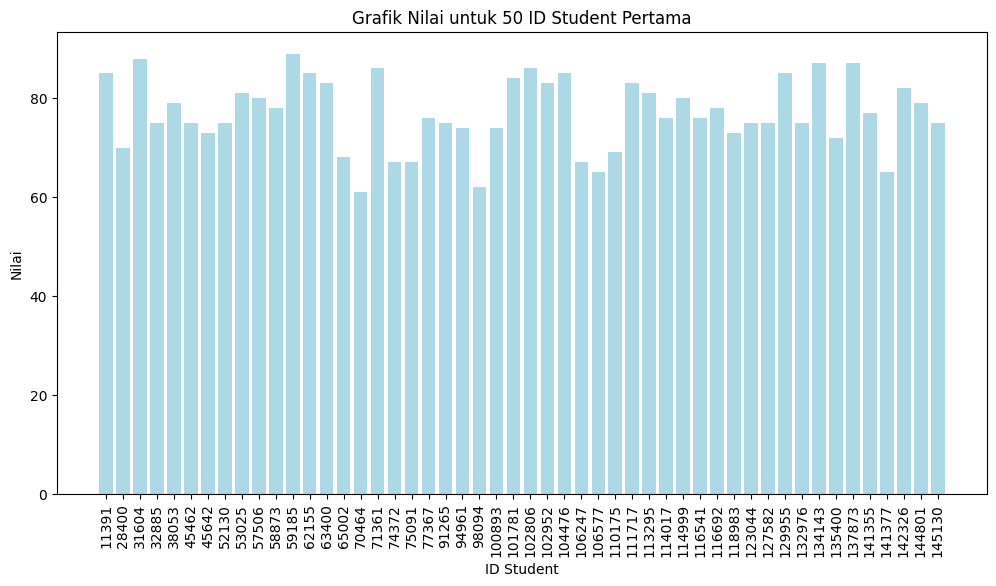

In [31]:
top_50_students = df_studass['id_student'].unique()[:50]
sorted_data = df_studass.sort_values(by='id_student')
filtered_data = sorted_data[sorted_data['id_student'].isin(top_50_students)]


# Buat grafik nilai
plt.figure(figsize=(12, 6))
plt.bar(filtered_data['id_student'].astype(str), filtered_data['score'], color='lightblue')
plt.xlabel('ID Student')
plt.ylabel('Nilai')
plt.title('Grafik Nilai untuk 50 ID Student Pertama')
plt.xticks(rotation=90)
plt.show()

#Student Info

In [32]:
df_studin.shape

(32593, 12)

(32593, 12) memberi informasi bahwa dataset terdiri dari 173912 baris data dan 12 kolom variabel.

In [33]:
df_studin.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [34]:
df_studin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


Penjelasan feature

1   code_module : kode identifikasi untuk modul tempat siswa terdaftar.

2   code_presentation : kode identifikasi presentasi saat siswa terdaftar pada modul.

3   id_student : nomor identifikasi unik untuk siswa.

4   gender : jenis kelamin siswa.

5   region : mengidentifikasi wilayah geografis, tempat tinggal siswa saat mengambil presentasi modul.

6   highest_education : tingkat pendidikan siswa tertinggi saat masuk ke presentasi modul.

7   imd_band : menentukan pita Indeks Kerusakan Berganda di tempat siswa tinggal selama presentasi modul.

8   age_band : kelompok usia siswa.

9   num_of_prev_attempts : berapa kali siswa mencoba modul ini.

10   studied_credits : jumlah total SKS untuk modul yang sedang dipelajari siswa.

11  disability : menunjukkan apakah siswa telah dinyatakan cacat.

12  final_result : hasil akhir siswa dalam presentasi modul.

In [35]:
df_studin.describe()

,id_student,num_of_prev_attempts,studied_credits
count,3.259300e+04,32593.000000,32593.000000
mean,7.066877e+05,0.163225,79.758691
std,5.491673e+05,0.479758,41.071900
min,3.733000e+03,0.000000,30.000000
25%,5.085730e+05,0.000000,60.000000
50%,5.903100e+05,0.000000,60.000000
75%,6.444530e+05,0.000000,120.000000
max,2.716795e+06,6.000000,655.000000


Menampilkan nilai tertinggi hingga nilai terendah, nilai rata-rata, dan standar deviasi tiap feature

**Data Cleaning**

In [36]:
nilai_null = df_studin.isnull().sum()
print("Nilai Null:")
print(nilai_null)

nilai_duplikat = df_studin.duplicated().sum()
print("\nNilai Duplikat:", nilai_duplikat)

Nilai Null:
code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

Nilai Duplikat: 0


Terdapat 1111 data bernilai null dan 0 data yang duplikat

In [37]:
df_studin = df_studin.ffill()
df_studin = df_studin.drop_duplicates()

In [38]:
df_studin.isna().sum()

code_module             0
code_presentation       0
id_student              0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
dtype: int64

Visualisasi

#Student Registrasi

In [39]:
df_studreg.shape

(32593, 5)

(32593, 5) memberi informasi bahwa dataset terdiri dari 173912 baris data dan 5 kolom variabel.

In [40]:
df_studreg.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [41]:
df_studreg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


Penjelasan feature

1   code_module : kode identifikasi untuk modul tempat siswa terdaftar.

2   code_presentation : kode identifikasi presentasi saat siswa terdaftar pada modul.

3   id_student : nomor identifikasi unik untuk siswa.

4   date_registration : tanggal pendaftaran siswa pada presentasi modul, ini adalah jumlah hari yang diukur relatif terhadap dimulainya presentasi modul

5   date_unregistration : tanggal pembatalan registrasi siswa dari presentasi modul, ini adalah jumlah hari yang diukur relatif terhadap awal presentasi modul.


In [42]:
df_studreg.describe()

,id_student,date_registration,date_unregistration
count,3.259300e+04,32548.000000,10072.000000
mean,7.066877e+05,-69.411300,49.757645
std,5.491673e+05,49.260522,82.460890
min,3.733000e+03,-322.000000,-365.000000
25%,5.085730e+05,-100.000000,-2.000000
50%,5.903100e+05,-57.000000,27.000000
75%,6.444530e+05,-29.000000,109.000000
max,2.716795e+06,167.000000,444.000000


Menampilkan nilai tertinggi hingga nilai terendah, nilai rata-rata, dan standar deviasi tiap feature

**Data Cleaning**

In [43]:
nilai_null = df_studreg.isnull().sum()
print("Nilai Null:")
print(nilai_null)

nilai_duplikat = df_studreg.duplicated().sum()
print("\nNilai Duplikat:", nilai_duplikat)

Nilai Null:
code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

Nilai Duplikat: 0


Terdapat 45 data bernilai null dari kolom date_unregistration dan 22521 dari kolom date_registration

In [44]:
df_studreg = df_studreg.ffill()
df_studreg = df_studreg.drop_duplicates()

In [45]:
df_studreg.isna().sum()

code_module            0
code_presentation      0
id_student             0
date_registration      0
date_unregistration    2
dtype: int64

Setekah di cleaning ternyata ada 2 data yang tidak terganti

#Student Vle

**EDA**

In [53]:
df_studvle.shape

(9868110, 6)

(10655280, 6) memberi informasi bahwa dataset terdiri dari 0655280 baris data dan 6 kolom variabel.


In [54]:
df_studvle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
5,AAA,2013J,28400,546652,-10,8


In [55]:
df_studvle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9868110 entries, 0 to 10655278
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 527.0+ MB


In [56]:
df_studvle.describe()

,id_student,id_site,date,sum_click
count,9.868110e+06,9.868110e+06,9.868110e+06,9.868110e+06
mean,7.339467e+05,7.372334e+05,9.449918e+01,3.885553e+00
std,5.841796e+05,1.312501e+05,7.602741e+01,9.162606e+00
min,6.516000e+03,5.267210e+05,-2.500000e+01,1.000000e+00
25%,5.067050e+05,6.735190e+05,2.400000e+01,1.000000e+00
50%,5.881250e+05,7.300540e+05,8.500000e+01,2.000000e+00
75%,6.464320e+05,8.770230e+05,1.560000e+02,4.000000e+00
max,2.698588e+06,1.049562e+06,2.690000e+02,6.977000e+03


Menampilkan nilai tertinggi hingga nilai terendah, nilai rata-rata, dan standar deviasi tiap feature

**Cleaning Data**

In [57]:
nilai_null = df_studvle.isnull().sum()
print("Nilai Null:")
print(nilai_null)

nilai_duplikat = df_studvle.duplicated().sum()
print("\nNilai Duplikat:", nilai_duplikat)

Nilai Null:
code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

Nilai Duplikat: 0


Terdapat  data 0 bernilai null dan 787170 data yang duplikat

In [58]:
df_studvle=df_studvle.ffill()
df_studvle=df_studvle.drop_duplicates()

In [59]:
df_studass.isna().sum()

id_assessment     0
id_student        0
date_submitted    0
is_banked         0
score             0
dtype: int64